In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

In [2]:
df=pd.read_csv('./4.csv')
df.head()

,date,time,open,high,low,close,value,volume
0,20230628,1530,127700,127700,127700,127700,1582710000,12394
1,20230628,1520,127800,127900,127600,127700,265480000,2079
2,20230628,1519,128000,128000,127800,127800,297460000,2326
3,20230628,1518,128200,128300,127700,128000,135220000,1057
4,20230628,1517,128000,128300,127900,128200,774400000,6046


In [3]:
df

,date,time,open,high,low,close,value,volume
0,20230628,1530,127700,127700,127700,127700,1582710000,12394
1,20230628,1520,127800,127900,127600,127700,265480000,2079
2,20230628,1519,128000,128000,127800,127800,297460000,2326
3,20230628,1518,128200,128300,127700,128000,135220000,1057
4,20230628,1517,128000,128300,127900,128200,774400000,6046
...,...,...,...,...,...,...,...,...
188066,20210629,905,46450,46500,46450,46450,40970000,882
188067,20210629,904,46500,46500,46400,46450,169990000,3659
188068,20210629,903,46600,46600,46500,46500,195450000,4200
188069,20210629,902,46600,46650,46550,46600,167290000,3590


In [4]:
r_idx= [i for i in range(df.shape[0]-1,-1,-1)]

df = pd.DataFrame(df, index=r_idx)
df

,date,time,open,high,low,close,value,volume
188070,20210629,901,46600,46800,46600,46600,171040000,3669
188069,20210629,902,46600,46650,46550,46600,167290000,3590
188068,20210629,903,46600,46600,46500,46500,195450000,4200
188067,20210629,904,46500,46500,46400,46450,169990000,3659
188066,20210629,905,46450,46500,46450,46450,40970000,882
...,...,...,...,...,...,...,...,...
4,20230628,1517,128000,128300,127900,128200,774400000,6046
3,20230628,1518,128200,128300,127700,128000,135220000,1057
2,20230628,1519,128000,128000,127800,127800,297460000,2326
1,20230628,1520,127800,127900,127600,127700,265480000,2079


In [5]:
plt.style.use('ggplot') #ggplot스타일 사용

# 주가의 이동평균선을 구한 후 시각화하기

이동평균선은 "일정 기간 동안의 주가를 산술 평균한 값인 주가이동평균을 차례로 연결해 만든 선"으로 정의한다.

이동평균선을 그리려면 먼저 여러개의 주가이동평균 값이 필요합니다. 여기서 말하는 주가이동평균이란 일정기간의 주가를 산술 평균한 값을 말한다. 만일 parameter에서 window=5인 것은 5일 주가이동평균을 말하고 이를 연결한 선이 5일 주가이동평균 선이다.

주가이동평균선은 시장의 전반적인 주가 흐름을 판단하고 향후 주가의 추이를 전망하는데 자주 사용되는 기술지표이다. 특히 주가이동평균선은 5일 20일 60일 120일 이동평균선이 서로 교차하게 되는데 이를 cross라고 부르며 이시점이 매우 중요한 매매시점이러고 생각하면 된다.



### lg이노텍 주가데이터 수집

In [6]:
df.head(10) #change - 변동량은 전일 종가에 비해서 오늘 종가의 변동량을 말한다.

,date,time,open,high,low,close,value,volume
188070,20210629,901,46600,46800,46600,46600,171040000,3669
188069,20210629,902,46600,46650,46550,46600,167290000,3590
188068,20210629,903,46600,46600,46500,46500,195450000,4200
188067,20210629,904,46500,46500,46400,46450,169990000,3659
188066,20210629,905,46450,46500,46450,46450,40970000,882
188065,20210629,906,46450,46500,46400,46500,148530000,3200
188064,20210629,907,46450,46500,46400,46400,46730000,1006
188063,20210629,908,46400,46450,46400,46450,43160000,930
188062,20210629,909,46400,46450,46400,46400,67210000,1448
188061,20210629,910,46400,46400,46350,46400,101030000,2178


### 이동평균선 구하기

In [7]:
#이동평균 계산 - 5개씩 이동평균을 낸다. / 아래의 코드는 5일 주가 이동평균을 계산한 것
#window- 몇개씩 연산할지 입력

#rolling의 parameter에 center = True를 넣어주면 중심이동평균선으로 구해준다.

#n일 이동평균값을 구하는 식은 기준일로부터 (기준일 포함하여) 5일의 종가데이터를 산술평균하는 것이다.

In [8]:
ma_ls = [5,20,60,120]
for i in range(len(ma_ls)):
    a = df['close'].rolling(window=ma_ls[i]).mean()
    df['MA'+str(ma_ls[i])] = a

In [9]:
df.head()

,date,time,open,high,low,close,value,volume,MA5,MA20,MA60,MA120
188070,20210629,901,46600,46800,46600,46600,171040000,3669,NaN,NaN,NaN,NaN
188069,20210629,902,46600,46650,46550,46600,167290000,3590,NaN,NaN,NaN,NaN
188068,20210629,903,46600,46600,46500,46500,195450000,4200,NaN,NaN,NaN,NaN
188067,20210629,904,46500,46500,46400,46450,169990000,3659,NaN,NaN,NaN,NaN
188066,20210629,905,46450,46500,46450,46450,40970000,882,46520.0,NaN,NaN,NaN


In [10]:
np.mean(df['close'].iloc[0:5])

46520.0

In [11]:
df.reset_index(level=0, inplace=True)
## drop 함수 이용하기

In [12]:
df.head()

,index,date,time,open,high,low,close,value,volume,MA5,MA20,MA60,MA120
0,188070,20210629,901,46600,46800,46600,46600,171040000,3669,NaN,NaN,NaN,NaN
1,188069,20210629,902,46600,46650,46550,46600,167290000,3590,NaN,NaN,NaN,NaN
2,188068,20210629,903,46600,46600,46500,46500,195450000,4200,NaN,NaN,NaN,NaN
3,188067,20210629,904,46500,46500,46400,46450,169990000,3659,NaN,NaN,NaN,NaN
4,188066,20210629,905,46450,46500,46450,46450,40970000,882,46520.0,NaN,NaN,NaN


In [13]:
df.drop(labels='index', axis=1, inplace=True)

### 이동평균선을 이용한 시각화

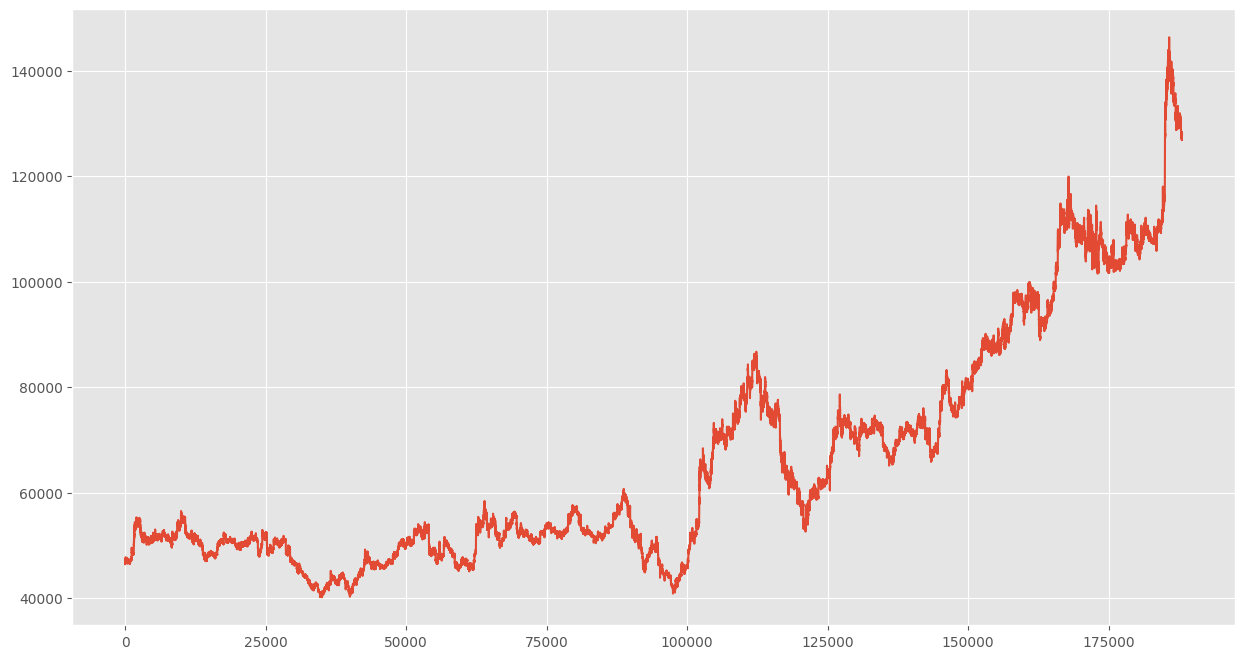

In [14]:
plt.figure(figsize = (15,8))
plt.plot(df.index,df['close'],label = '일일 종가')

<Axes: >

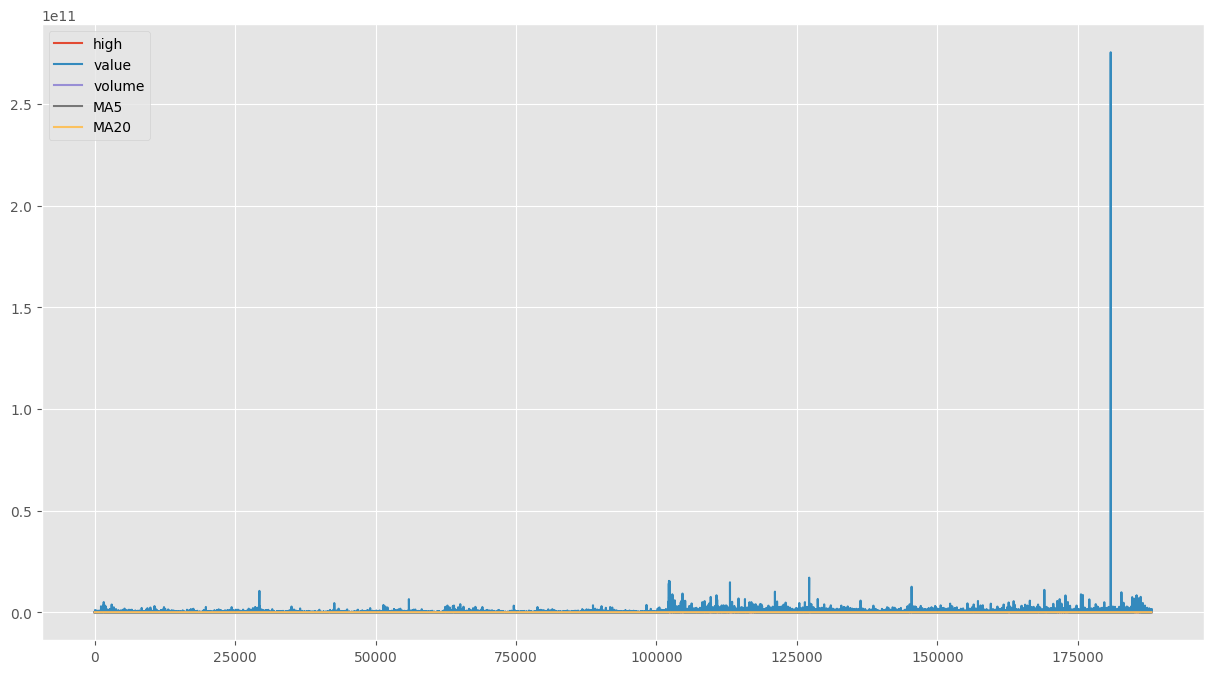

In [15]:
df.iloc[:,[3,6,7,8,9]].plot(figsize = (15,8))

이동평균선을 통해서 알 수 있는 것은 이동평균선의 window가 높아질수록 점점 smooth line에 가까워지는 것을 알 수 있습니다.

### 이동평균을 통해서 최적의 주식 매매시점 탐색

In [16]:
#MA20과 MA60의 cross를 반환해주는 함수 
abs(df['MA20']-df['MA60']).sort_values().head(10).index

#해다 주식의 20일 이동평균과 60일 이동평균을 이용하여 구한 최적의 매매시점은 다음과 같다.
#여기서 반환해주는 날짜는 + - 1일을 기준으로 ma20과 ma60이 교차하는 날짜인 즉, cross 날짜가 된다.

Index([80506, 16349, 154540, 46211, 67289, 154511, 27655, 67290, 67291, 21356], dtype='int64')

In [17]:
date_index = abs(df['MA20']-df['MA60']).sort_values().head(10).index

In [18]:
#iloc는 정수만을 사용해서 뽑아야하며 loc는 정수로도 가능하지만 변수명이나 index명을 이용해서 데이터를 추출할 수 있다.
df.loc[abs(df['MA20']-df['MA60']).sort_values().head(10).index,:]

,date,time,open,high,low,close,value,volume,MA5,MA20,MA60,MA120
80506,20220509,1207,56100,56100,56000,56100,47190000,842,56020.0,56140.0,56140.0,56255.833333
16349,20210827,1450,48250,48300,48250,48300,7970000,165,48310.0,48367.5,48367.5,48367.083333
154540,20230217,1518,88300,88300,88200,88200,65050000,737,88260.0,88355.0,88355.0,88352.500000
46211,20211223,1100,46000,46000,45950,46000,8560000,186,46050.0,46065.0,46065.0,45961.666667
67289,20220318,1404,51300,51400,51300,51400,36380000,708,51360.0,51355.0,51355.0,51249.166667
154511,20230217,1449,88500,88500,88400,88500,113000000,1277,88440.0,88330.0,88330.0,88309.166667
27655,20211015,1246,50200,50200,50100,50100,6070000,121,50140.0,50180.0,50180.0,50225.833333
67290,20220318,1405,51400,51400,51300,51300,56210000,1094,51360.0,51355.0,51355.0,51250.000000
67291,20220318,1406,51400,51400,51200,51300,106800000,2082,51340.0,51355.0,51355.0,51251.666667
21356,20210916,923,50200,50200,50100,50200,49230000,982,50240.0,50405.0,50405.0,50331.666667


#### 10개의 매매시점과 시각화한 자료와 비교해서 분석을 해보았을 때 가장 최적의 주식 매수시점은 2016년 12/5일 임을 알 수 있다. 

#### 이제 함수를 직접 만들어 볼건데 주식을 매수한 시점부터 지니고 있을 기간을 파라미터로 두고 각 기간별로 최적의 매수시점을 구하는 함수를 만들어 보자
파라미터로 사용할 기간은 3개월/6개월/9개월

## 데드크로스와 골든크로스를 비교해서 분석

In [19]:
import time
import warnings
import numpy as np
from numpy import newaxis
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white',figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    print ('yo')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(int(i * prediction_len))]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'r').read()
    data = f.split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : ", time.time() - start)
    return model

def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in xrange(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in range(len(data)//prediction_len):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

In [22]:
from keras.datasets import reuters
from tensorflow.python.keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import *
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.initializers import Constant
import tensorflow as tf
from keras.callbacks import *
from keras.models import load_model


import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [23]:
import tensorflow as tf

In [24]:
from keras.models import Sequential
import keras
from keras import layers, models, datasets
from keras import backend as K
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler

In [25]:
import numpy as np
import keras
from keras import layers, models, datasets
from keras import backend as K
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import os

In [26]:
plt.style.use('ggplot') #ggplot스타일 사용

In [27]:
df.head()

,date,time,open,high,low,close,value,volume,MA5,MA20,MA60,MA120
0,20210629,901,46600,46800,46600,46600,171040000,3669,NaN,NaN,NaN,NaN
1,20210629,902,46600,46650,46550,46600,167290000,3590,NaN,NaN,NaN,NaN
2,20210629,903,46600,46600,46500,46500,195450000,4200,NaN,NaN,NaN,NaN
3,20210629,904,46500,46500,46400,46450,169990000,3659,NaN,NaN,NaN,NaN
4,20210629,905,46450,46500,46450,46450,40970000,882,46520.0,NaN,NaN,NaN


<Axes: >

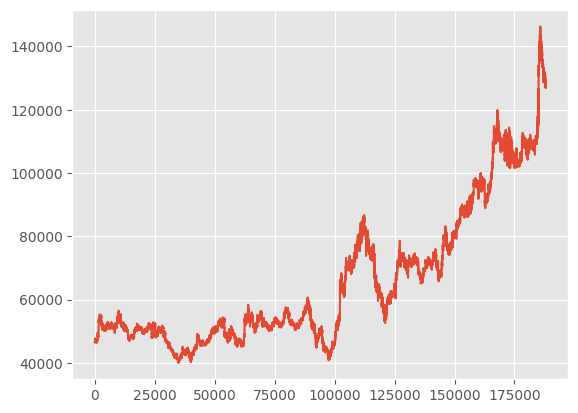

In [28]:
df['close'].plot()

In [30]:
df[['close']].to_csv('./4.csv',index=False)

In [31]:
norm_ls = []
for i in range(len(df)):
    norm_ls0 = (df['close'].iloc[i] / df['close'].iloc[0])-1
    norm_ls.append(norm_ls0)

In [32]:
cl = pd.DataFrame(norm_ls,columns = ['close'])

In [34]:
import ta

H, L, C, V = df['high'], df['low'], df['close'], df['value']

# df['bol_high'] = ta.volatility.bollinger_hband(C)
# df['bol_low']  = ta.volatility.bollinger_lband(C)
df['MFI'] = ta.volume.money_flow_index(
    high=H, low=L, close=C, volume=V, fillna=True)

df['ADI'] = ta.volume.acc_dist_index(
    high=H, low=L, close=C, volume=V, fillna=True)

df['OBV'] = ta.volume.on_balance_volume(close=C, volume=V, fillna=True)
df['CMF'] = ta.volume.chaikin_money_flow(
    high=H, low=L, close=C, volume=V, fillna=True)

df['FI'] = ta.volume.force_index(close=C, volume=V, fillna=True)
df['EOM, EMV'] = ta.volume.ease_of_movement(
    high=H, low=L, volume=V, fillna=True)

df['VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)
df['NVI'] = ta.volume.negative_volume_index(close=C, volume=V, fillna=True)
df['VMAP'] = ta.volume.volume_weighted_average_price(
    high=H, low=L, close=C, volume=V, fillna=True)

# Volatility
df['ATR'] = ta.volatility.average_true_range(
    high=H, low=L, close=C, fillna=True)
df['BHB'] = ta.volatility.bollinger_hband(close=C, fillna=True)
df['BLB'] = ta.volatility.bollinger_lband(close=C, fillna=True)
df['KCH'] = ta.volatility.keltner_channel_hband(
    high=H, low=L, close=C, fillna=True)
df['KCL'] = ta.volatility.keltner_channel_lband(
    high=H, low=L, close=C, fillna=True)
df['KCM'] = ta.volatility.keltner_channel_mband(
    high=H, low=L, close=C, fillna=True)
df['DCH'] = ta.volatility.donchian_channel_hband(
    high=H, low=L, close=C, fillna=True)
df['DCL'] = ta.volatility.donchian_channel_lband(
    high=H, low=L, close=C, fillna=True)
df['DCM'] = ta.volatility.donchian_channel_mband(
    high=H, low=L, close=C, fillna=True)
df['UI'] = ta.volatility.ulcer_index(close=C, fillna=True)
# Trend
df['SMA'] = ta.trend.sma_indicator(close=C, fillna=True)
df['EMA'] = ta.trend.ema_indicator(close=C, fillna=True)
df['WMA'] = ta.trend.wma_indicator(close=C, fillna=True)
df['MACD'] = ta.trend.macd(close=C, fillna=True)
df['ADX'] = ta.trend.adx(high=H, low=L, close=C, fillna=True)
df['-VI'] = ta.trend.vortex_indicator_neg(
    high=H, low=L, close=C, fillna=True)
df['+VI'] = ta.trend.vortex_indicator_pos(
    high=H, low=L, close=C, fillna=True)
df['TRIX'] = ta.trend.trix(close=C, fillna=True)
df['MI'] = ta.trend.mass_index(high=H, low=L, fillna=True)
df['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)
df['DPO'] = ta.trend.dpo(close=C, fillna=True)
df['KST'] = ta.trend.kst(close=C, fillna=True)
df['Ichimoku'] = ta.trend.ichimoku_a(high=H, low=L, fillna=True)
df['Parabolic SAR'] = ta.trend.psar_down(
    high=H, low=L, close=C, fillna=True)
df['STC'] = ta.trend.stc(close=C, fillna=True)
# Momentum
df['RSI'] = ta.momentum.rsi(close=C, fillna=True)
df['SRSI'] = ta.momentum.stochrsi(close=C, fillna=True)
df['TSI'] = ta.momentum.tsi(close=C, fillna=True)
df['UO'] = ta.momentum.ultimate_oscillator(
    high=H, low=L, close=C, fillna=True)
df['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
df['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
df['AO'] = ta.momentum.awesome_oscillator(high=H, low=L, fillna=True)
df['KAMA'] = ta.momentum.kama(close=C, fillna=True)
df['ROC'] = ta.momentum.roc(close=C, fillna=True)
df['PPO'] = ta.momentum.ppo(close=C, fillna=True)
df['PVO'] = ta.momentum.pvo(volume=V, fillna=True)

df.head(100)

,date,time,open,high,low,close,value,volume,MA5,MA20,...,SRSI,TSI,UO,SR,WR,AO,KAMA,ROC,PPO,PVO
0,20210629,901,46600,46800,46600,46600,171040000,3669,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,46600.000000,0.000000,0.000000,0.000000
1,20210629,902,46600,46650,46550,46600,167290000,3590,NaN,NaN,...,0.000000,0.000000,16.666667,20.000000,-80.000000,0.000000,46600.000000,0.000000,0.000000,-0.175182
2,20210629,903,46600,46600,46500,46500,195450000,4200,NaN,NaN,...,0.000000,-100.000000,12.500000,0.000000,-100.000000,0.000000,46599.583767,0.000000,-0.017121,0.994416
3,20210629,904,46500,46500,46400,46450,169990000,3659,NaN,NaN,...,0.000000,-100.000000,20.000000,12.500000,-87.500000,0.000000,46598.961150,0.000000,-0.038910,0.722019
4,20210629,905,46450,46500,46450,46450,40970000,882,46520.0,NaN,...,0.000000,-100.000000,18.181818,12.500000,-87.500000,0.000000,46532.756194,0.000000,-0.055545,-5.797918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20210629,1036,47650,47700,47600,47650,117670000,2470,47550.0,47365.0,...,0.584951,35.553597,60.742115,72.727273,-27.272727,263.382353,46944.247006,0.633580,0.249142,35.107688
96,20210629,1037,47600,47650,47550,47550,98680000,2073,47600.0,47390.0,...,0.209054,33.748607,58.843537,54.545455,-45.454545,315.147059,46946.768350,0.422386,0.246568,27.332308
97,20210629,1038,47600,47600,47550,47550,74400000,1564,47630.0,47412.5,...,0.209054,32.415232,56.734694,54.545455,-45.454545,348.382353,46949.279200,0.528541,0.241732,19.651594
98,20210629,1039,47550,47600,47550,47600,33020000,694,47600.0,47422.5,...,0.315258,32.130082,56.989796,63.636364,-36.363636,325.147059,46951.987715,0.527983,0.243579,11.012219


In [35]:
df.tail(20)

,date,time,open,high,low,close,value,volume,MA5,MA20,...,SRSI,TSI,UO,SR,WR,AO,KAMA,ROC,PPO,PVO
188051,20230628,1502,127200,127200,127100,127200,46920000,369,127160.0,127110.0,...,0.822412,-6.257930,60.684063,66.666667,-33.333333,-102.941176,128415.993653,-0.078555,-0.038692,-4.738618
188052,20230628,1503,127100,127200,127100,127100,181120000,1424,127200.0,127105.0,...,0.625854,-5.994811,56.249500,50.000000,-50.000000,-32.647059,128410.516052,0.078740,-0.037098,-5.149177
188053,20230628,1504,127200,127200,127100,127200,54560000,429,127180.0,127100.0,...,0.829817,-4.775376,62.176871,66.666667,-33.333333,-3.823529,128405.477484,0.078678,-0.029151,-10.828943
188054,20230628,1505,127200,127200,127100,127200,90920000,715,127180.0,127100.0,...,0.829817,-3.792621,64.285714,66.666667,-33.333333,-6.470588,128400.459888,0.236407,-0.022593,-14.001224
188055,20230628,1506,127200,127200,127100,127200,278360000,2190,127180.0,127105.0,...,0.829817,-2.985755,58.967699,66.666667,-33.333333,-22.058824,128395.463176,0.078678,-0.017198,-7.767057
188056,20230628,1507,127100,127200,127000,127100,329120000,2590,127160.0,127105.0,...,0.599991,-3.297722,61.018981,50.000000,-50.000000,-26.176471,128390.071030,0.078740,-0.019049,-1.040399
188057,20230628,1508,127100,127200,126900,127100,303520000,2389,127160.0,127105.0,...,0.599991,-3.556248,66.152683,50.000000,-50.000000,-35.882353,128384.701328,0.078740,-0.020282,2.849669
188058,20230628,1509,127100,127100,127000,127100,95440000,751,127140.0,127100.0,...,0.599991,-3.773432,67.359307,50.000000,-50.000000,-45.588235,128379.353975,0.236593,-0.021017,-2.064566
188059,20230628,1510,127100,127300,127000,127200,168890000,1328,127140.0,127095.0,...,0.872032,-2.814716,69.628303,66.666667,-33.333333,-39.705882,128374.445114,0.236407,-0.015079,-3.149232
188060,20230628,1511,127200,127300,127200,127300,63370000,498,127160.0,127110.0,...,1.000000,-0.861818,71.890643,83.333333,-16.666667,-16.764706,128369.972918,0.000000,-0.003982,-8.562584
